# Plot existing versus expected equivalent pathway mappings from GSEA results

In [1]:
import getpass
import sys
import time

import os
import collections
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests


from pathway_forte.pathway_enrichment.functional_class import get_analogs_comparison_numbers

In [2]:
%matplotlib inline

In [3]:
mpl.rcParams['figure.dpi'] = 200

In [4]:
print(getpass.getuser())

ddomingofernandez


In [5]:
print(sys.version)

3.6.5 (default, Apr 20 2018, 08:54:42) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-16)]


In [6]:
print(time.asctime())

Mon May 27 09:29:54 2019


In [7]:
def filter_df(path):
    # Get list of pathways after filtering dataFrame
    df = pd.read_csv(path, sep='\t')

    # Get list of pvalues
    pvals = df['pval'].tolist()
    
    # Calculate multiple test correction
    correction_test = multipletests(pvals, method='fdr_bh')
    df['qval'] = correction_test[1]
    
    #print(f"Total pathways before filtering {df.shape[0]}")
    # Remove pathways with a q value larger than 0.05
    df = df[df['qval'] < 0.05]
    
    #print(f"Total pathways after filtering {df.shape[0]}")
    
    return df

def get_gsea_results(dataset):
    """Get GSEA results for KEGG, Reactome and WikiPathways."""
    # Point to the folder where results are
    try:
        GSEA = os.environ["RESULTS"]
    except:
        ValueError("Please set the directory where the results are in your bashrc as 'RESULT' or hardcode the path here")
    
    kegg_reactome_path = os.path.join(GSEA, f'kegg_reactome_{dataset}.tsv')
    reactome_wikipathways_path = os.path.join(GSEA, f'reactome_wikipathways_{dataset}.tsv')
    kegg_wikipathways_path = os.path.join(GSEA, f'kegg_wikipathways_{dataset}.tsv')
       
    kegg_reactome_df = filter_df(kegg_reactome_path)
    reactome_wikipathways_df = filter_df(reactome_wikipathways_path)
    kegg_wikipathways_df = filter_df(kegg_wikipathways_path)
        
    return kegg_reactome_df, reactome_wikipathways_df, kegg_wikipathways_df

Load results

In [8]:
brca_1, brca_2, brca_3 = get_gsea_results('brca')
kirc_1, kirc_2, kirc_3 = get_gsea_results('kirc')
lihc_1, lihc_2, lihc_3 = get_gsea_results('lihc')
prad_1, prad_2, prad_3 = get_gsea_results('prad')

In [9]:
brca_actual_dict, brca_expected_dict = get_analogs_comparison_numbers(brca_1, brca_2, brca_3, pathway_column="Term")
kirc_actual_dict, kirc_expected_dict = get_analogs_comparison_numbers(kirc_1, kirc_2, kirc_3, pathway_column="Term")
lihc_actual_dict, lihc_expected_dict = get_analogs_comparison_numbers(lihc_1, lihc_2, lihc_3, pathway_column="Term")
prad_actual_dict, prad_expected_dict = get_analogs_comparison_numbers(prad_1, prad_2, prad_3, pathway_column="Term")

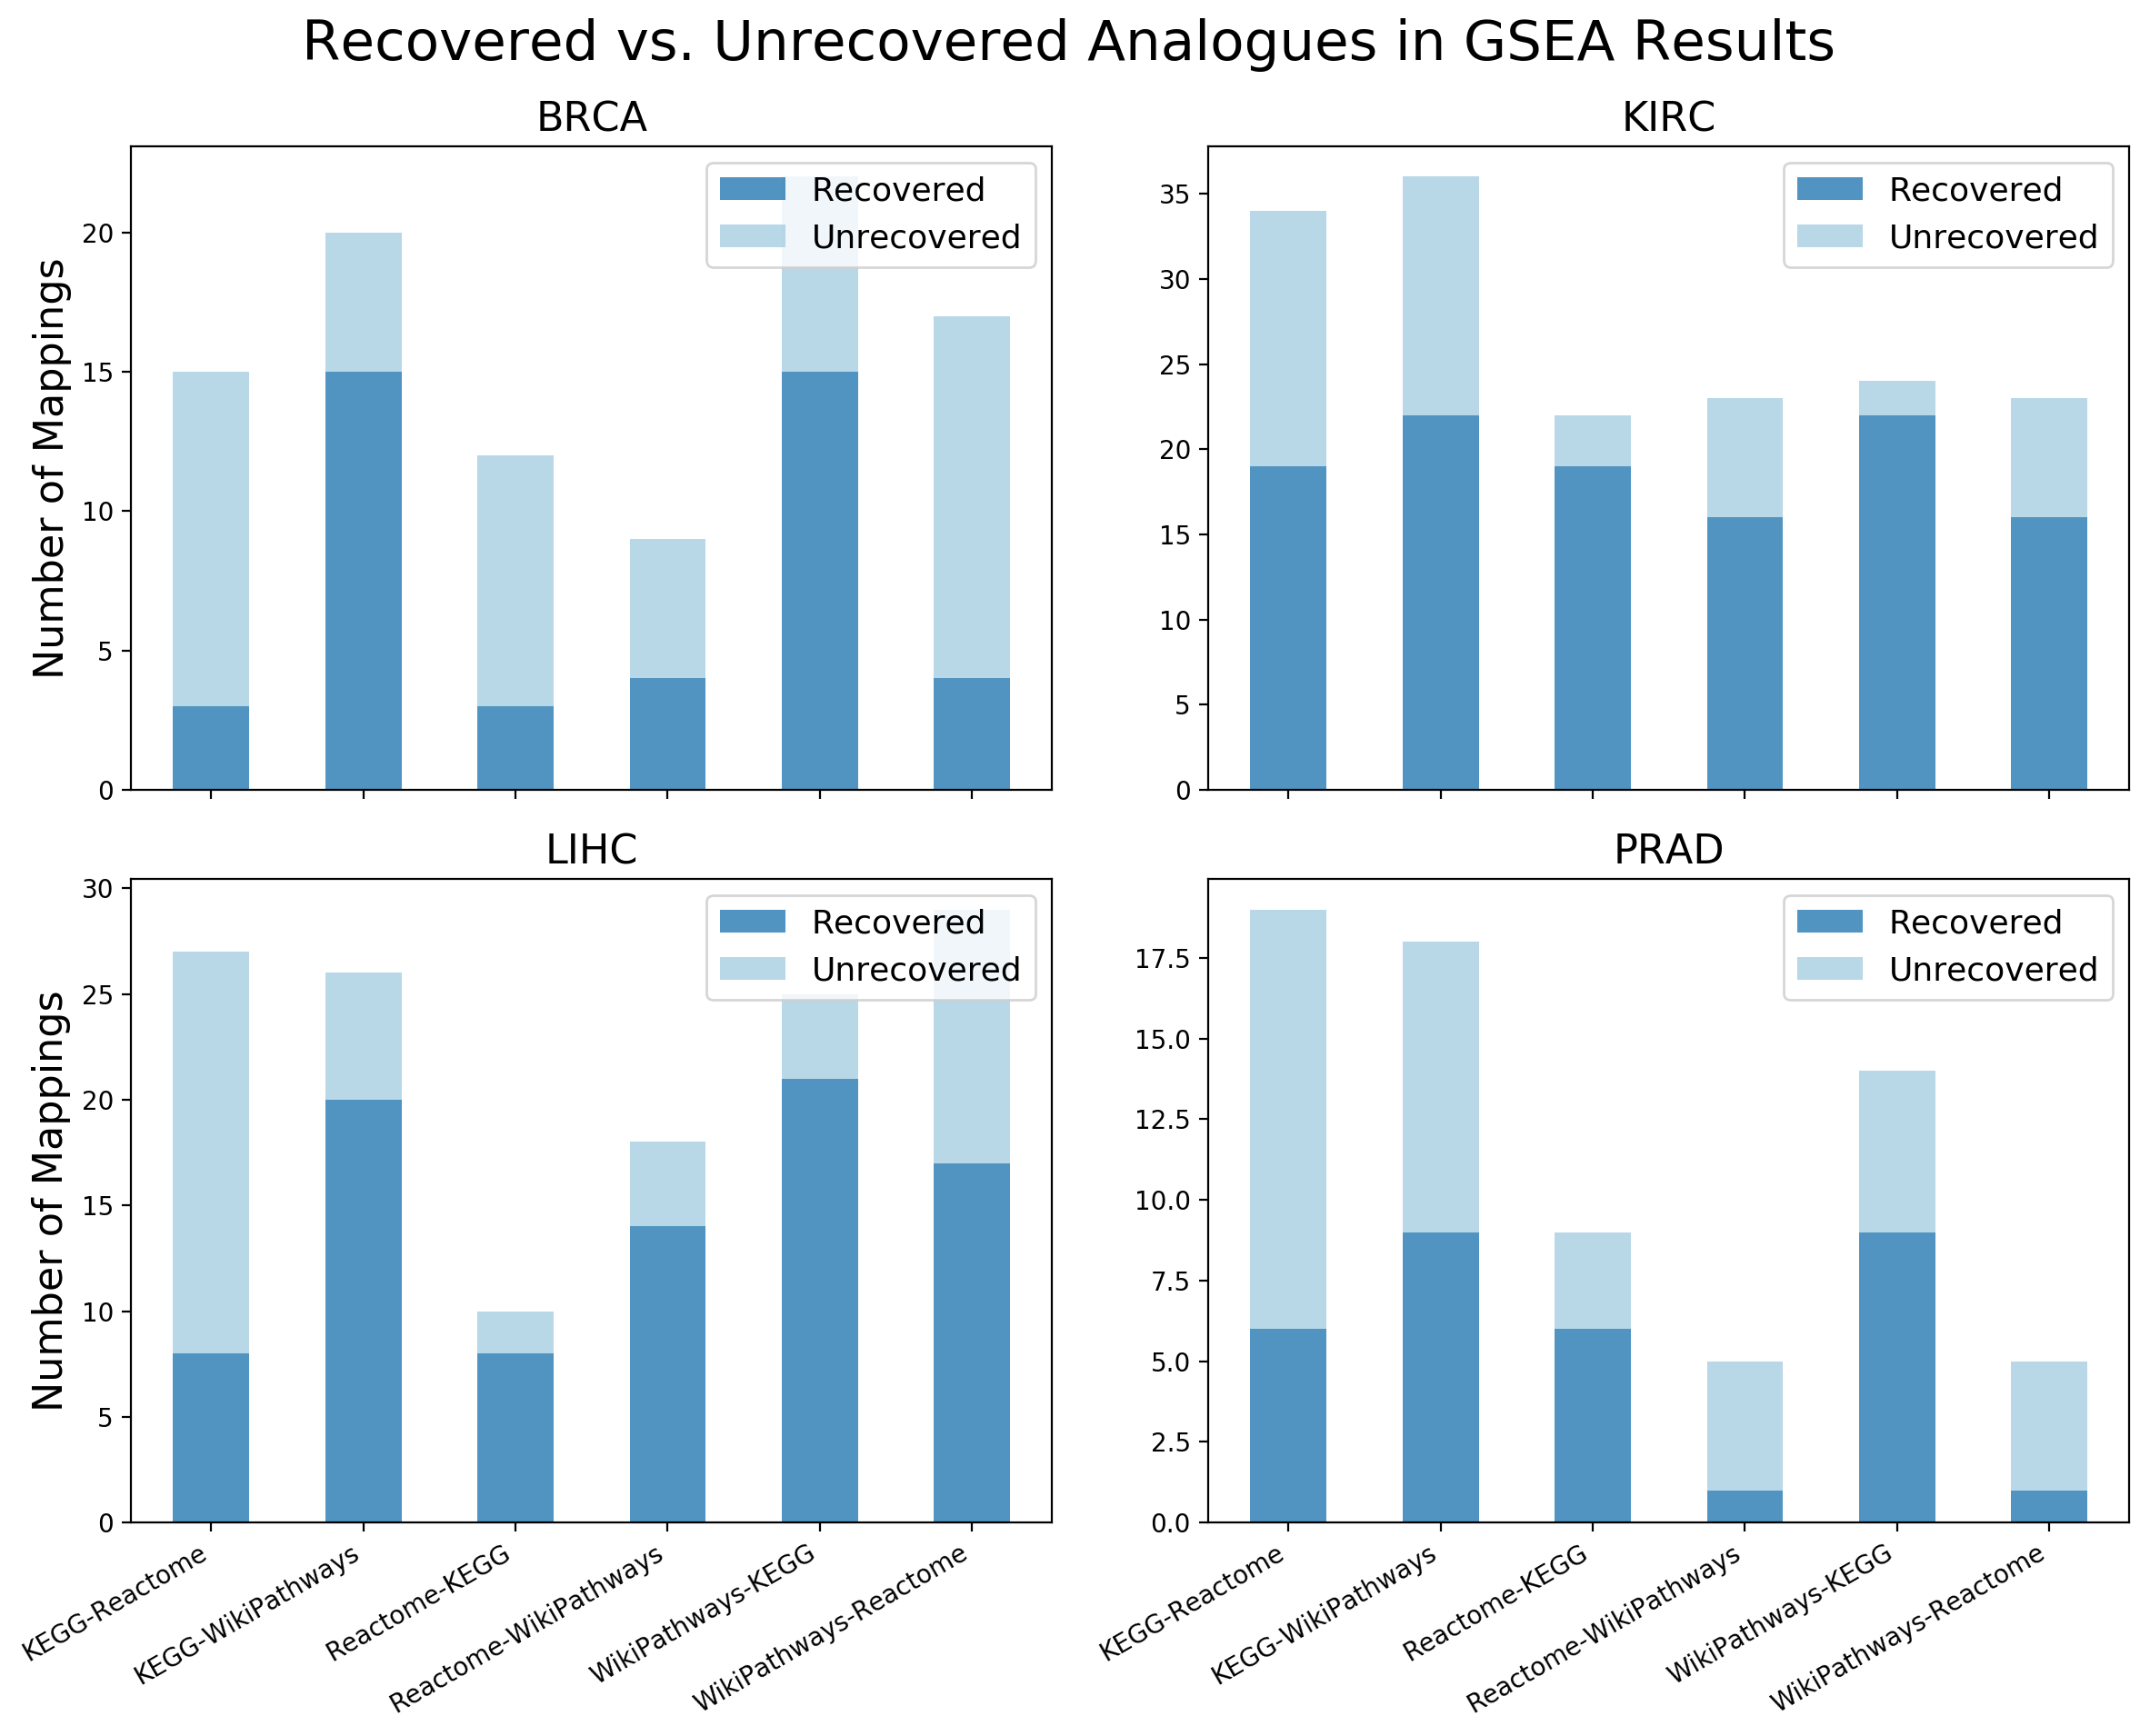

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.suptitle('Recovered vs. Unrecovered Analogues in GSEA Results', fontsize=22)

N = 6
index = np.arange(N)
bar_width = 0.5
opacity = 0.8

pairings = (
    'KEGG-Reactome', 
    'KEGG-WikiPathways', 
    'Reactome-KEGG', 
    'Reactome-WikiPathways',
    'WikiPathways-KEGG', 
    'WikiPathways-Reactome',
)

label_font = {'size': 16}

plt.subplot(2, 2, 1)
actual_vals = list(brca_actual_dict.values())
expected_vals = list(brca_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('BRCA', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 2)
actual_vals = list(kirc_actual_dict.values())
expected_vals = list(kirc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('KIRC', fontsize=16)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 3)
actual_vals = list(lihc_actual_dict.values())
expected_vals = list(lihc_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('LIHC', fontsize=16)
plt.ylabel('Number of Mappings', fontdict=label_font)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=1)

plt.subplot(2, 2, 4)
actual_vals = list(prad_actual_dict.values())
expected_vals = list(prad_expected_dict.values())
difference = [x - y for x, y in zip(expected_vals, actual_vals)]

p1 = plt.bar(index, actual_vals, bar_width,alpha=opacity, color='#2679b2',label='Recovered')
p2 = plt.bar(index, difference, bar_width, bottom=actual_vals, alpha=opacity, color='#a7cee2',label='Unrecovered')

plt.title('PRAD', fontsize=16)
plt.xticks(index, pairings)
plt.legend(prop={'size':13},loc=1)

fig.autofmt_xdate()
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('pairwise_mappings_gsea.png',dpi=250)
plt.show()